![title](fk1.png)

In [ ]:
Wimport numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import gensim
from gensim.utils import simple_preprocess


In [25]:
import nltk
nltk.download('stopwords')

from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import warnings

# Ignorer tous les avertissements
warnings.filterwarnings('ignore')

In [20]:
# on visuamlize notre data (true.csv et fake .csv )
df_true = pd.read_csv("true_eng_ch.csv")
df_fake = pd.read_csv("fake_ch.csv")

In [21]:
df_true.head()

,Title,Paragraph,Date
0,Taraji P. Henson Breaks Down In Tears As She C...,"Ousted Rep. George Santos makes a cameo in ""Th...",2023-12-21
1,TSA Officers Find 17 Bullets Hidden In Baby Di...,"“Congresswoman, you’re saying that’s what you ...",2023-12-21
2,Cameron Diaz Wants To ‘Normalize’ Separate Bed...,"The ""Late Show"" host hit Donald Trump's former...",2023-12-21
3,Federal Judge Blocks California Law That Would...,The Fox News host disagreed with other media f...,2023-12-21
4,Scientists Have Discovered A Cause For Extreme...,"""You can do a lot with a telephone,"" the forme...",2023-12-21


In [22]:
df_fake.head()

,Title,Paragraph,Date
0,Conservatives Reveal Why They’re So Triggered ...,After threatening boycotts of companies and vi...,2023-05-29
1,Matt Gaetz Takes Out Half-Page Ad In House Bil...,…,2023-05-29
2,Ron DeSantis Relaunches Presidential Campaign ...,WASHINGTON—Shelling out $55 for the loving tri...,2023-05-29
3,Presidential Candidate Profile: Tim Scott,…,2023-05-29
4,Senate Freaking Out After Dianne Feinstein Get...,"TALLAHASSEE, FL—Attempting his formal announce...",2023-05-29


In [23]:
print("True news data length",df_true.shape)
print("Fake news data length", df_fake.shape)

True news data length (16403, 3)
Fake news data length (31528, 3)


In [24]:
# Supprimer les lignes où  où paraghraph est égal à "..."
df_fake = df_fake[df_fake['Paragraph'] != '…']

In [25]:
df_fake.head()

,Title,Paragraph,Date
0,Conservatives Reveal Why They’re So Triggered ...,After threatening boycotts of companies and vi...,2023-05-29
2,Ron DeSantis Relaunches Presidential Campaign ...,WASHINGTON—Shelling out $55 for the loving tri...,2023-05-29
4,Senate Freaking Out After Dianne Feinstein Get...,"TALLAHASSEE, FL—Attempting his formal announce...",2023-05-29
6,Ricocheting Bullets Swiss Cheese Greg Abbott’s...,South Carolina Sen. Tim Scott announced his ca...,2023-05-29
8,Ron DeSantis Holds Press Conference To Slurp C...,WASHINGTON—Thrown into a panic when the confus...,2023-05-29


In [26]:
#on ajoute une colonne de class
df_fake["class"]=1
df_true["class"]=0

In [27]:
df_fake.head()

,Title,Paragraph,Date,class
0,Conservatives Reveal Why They’re So Triggered ...,After threatening boycotts of companies and vi...,2023-05-29,1
2,Ron DeSantis Relaunches Presidential Campaign ...,WASHINGTON—Shelling out $55 for the loving tri...,2023-05-29,1
4,Senate Freaking Out After Dianne Feinstein Get...,"TALLAHASSEE, FL—Attempting his formal announce...",2023-05-29,1
6,Ricocheting Bullets Swiss Cheese Greg Abbott’s...,South Carolina Sen. Tim Scott announced his ca...,2023-05-29,1
8,Ron DeSantis Holds Press Conference To Slurp C...,WASHINGTON—Thrown into a panic when the confus...,2023-05-29,1


In [28]:
df_true.head()

,Title,Paragraph,Date,class
0,Taraji P. Henson Breaks Down In Tears As She C...,"Ousted Rep. George Santos makes a cameo in ""Th...",2023-12-21,0
1,TSA Officers Find 17 Bullets Hidden In Baby Di...,"“Congresswoman, you’re saying that’s what you ...",2023-12-21,0
2,Cameron Diaz Wants To ‘Normalize’ Separate Bed...,"The ""Late Show"" host hit Donald Trump's former...",2023-12-21,0
3,Federal Judge Blocks California Law That Would...,The Fox News host disagreed with other media f...,2023-12-21,0
4,Scientists Have Discovered A Cause For Extreme...,"""You can do a lot with a telephone,"" the forme...",2023-12-21,0


###  DATA VISUALIZATION AND PREPROCESSING

In [29]:
#on supprime les valeurs nulles
df_true.isna().sum()

Title        0
Paragraph    0
Date         0
class        0
dtype: int64

In [30]:
df_fake.isna().sum()

Title        0
Paragraph    8
Date         0
class        0
dtype: int64

In [31]:
df_fake = df_fake.dropna(subset=['Paragraph']) 

In [32]:
df = pd.concat([df_true,df_fake]).reset_index(drop = True)
df.shape

(34195, 4)

In [33]:
# melanger la classe 
df=df.sample(frac=1) #ds la totalite de notre df 

In [34]:
df.head(20000)

,Title,Paragraph,Date,class
4799,Ukraine Ends Year Disappointed And Anxious By ...,The retired congressman also ruled out a run f...,2023-12-21,0
28074,New AI Can Predict Bordeaux Wine Origin With 1...,After fatally shooting two men at a Black Live...,2023-12-07,1
23953,Loose First-Grader Brings Home Different Frien...,A newly unemployed woman enjoys equal pay for ...,2012-10-10,1
15445,TSA Officers Find 17 Bullets Hidden In Baby Di...,An Air Force veteran could only say to me toda...,2023-12-21,0
21181,"Dark, Sinister Underbelly Of Small Suburban To...",WASHINGTON—Defending the law enforcement agenc...,2019-06-19,1
...,...,...,...,...
2287,Federal Judge Blocks California Law That Would...,"""This is what's known as telling on yourself,""...",2023-12-21,0
22309,How Colleges Are Keeping Their Campuses Safe,"FORT MEADE, MD—Explaining that things weren’t ...",2016-08-24,1
21663,Syrian Man Kept Up All Night By Neighbors Dying,"CORONA, CA—Boasting that their edgy new produc...",2018-05-14,1
28594,Endless Shrimp Deal Causes Major Profit Loss F...,"Henry Kissinger, former Secretary of State, na...",2023-12-07,1


In [35]:
df.duplicated().sum()

3149

In [36]:
df.drop_duplicates(keep='first', inplace=True)

In [37]:
df['class'].value_counts()

class
0    16268
1    14778
Name: count, dtype: int64

## Text Preprocessing

In [38]:
#La colonne 'Date' est importante pour l'analyse descriptive, mais pour la prédiction, elle est moins importante. 
df.drop(columns=['Date'], inplace = True)

In [39]:
#concatene titre avec paragraph pour faciliter la tache de nettoyage 
df['Title_Para'] = df['Title']+' '+ df['Paragraph']
df.head(20000)

,Title,Paragraph,class,Title_Para
4799,Ukraine Ends Year Disappointed And Anxious By ...,The retired congressman also ruled out a run f...,0,Ukraine Ends Year Disappointed And Anxious By ...
28074,New AI Can Predict Bordeaux Wine Origin With 1...,After fatally shooting two men at a Black Live...,1,New AI Can Predict Bordeaux Wine Origin With 1...
23953,Loose First-Grader Brings Home Different Frien...,A newly unemployed woman enjoys equal pay for ...,1,Loose First-Grader Brings Home Different Frien...
15445,TSA Officers Find 17 Bullets Hidden In Baby Di...,An Air Force veteran could only say to me toda...,0,TSA Officers Find 17 Bullets Hidden In Baby Di...
21181,"Dark, Sinister Underbelly Of Small Suburban To...",WASHINGTON—Defending the law enforcement agenc...,1,"Dark, Sinister Underbelly Of Small Suburban To..."
...,...,...,...,...
32266,Highlights Of The 2016 DNC,WASHINGTON—Knocking gingerly on the Oval Offic...,1,Highlights Of The 2016 DNC WASHINGTON—Knocking...
13246,Rite Aid Falsely Accused Shoppers Of Theft Usi...,The former vice president still leads in the p...,0,Rite Aid Falsely Accused Shoppers Of Theft Usi...
19270,Study Finds Drinking Children’s Blood No More ...,Court filings revealed that Alex Jones splurge...,1,Study Finds Drinking Children’s Blood No More ...
17499,Frantic John Kerry Looks On As Teresa Slowly L...,NEW YORK—Paying tribute to the efforts of coun...,1,Frantic John Kerry Looks On As Teresa Slowly L...


In [40]:
# Supprimer les ponctuations et les caracteristique inutiles 
characters_to_remove = ['?', '!', '*', '#', '$','£','’','‘','”','.','"','“'] 

# Fonction pour supprimer les caractères spécifiques
def remove_characters(text):
    for char in characters_to_remove:
        text = text.replace(char, '')
    return text

# Appliquer la fonction remove_characters à la colonne 'original'
df['Title_Para'] = df['Title_Para'].apply(remove_characters)

In [41]:
df['Title_Para'][12]

"Cameron Diaz Wants To Normalize Separate Bedrooms — But, Now That She's Slept On It  The rally remarks come from a former president who has criticized vermin political foes and pledged to be a dictator on day one of a new administration"

## PERFORM DATA CLEANING

In [42]:
stop_words_english = stopwords.words('english')
stop_words_english.extend(['from','subject','re','edu','use'])

In [43]:
print(list(stop_words_english))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
# efface les stop words in english , apllique fct preprocess avec lutilisation de package gensim qui traite les grands ensembles 
#de donnee textuelles et pr sa facilite d'utilisation avec des fonctionna avance 

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words_english :
            result.append(token)
            
    return result

In [45]:
# Apply the function to the dataframe
df['clean'] = df['Title_Para'].apply(preprocess)

In [36]:
#passant maintenat a la tokenization et le stemming 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chaym\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaym\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [48]:
# on passant maintenat a la tokenization et stemming 

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Fonction pour la lemmatisation
#prend une liste de tokens en entrée et retourne une nouvelle liste où chaque token est ramené à sa forme canonique ou lemmatizée
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Fonction pour la racinisation
# sert a reduit chaque mot de la liste a sa forme racine 
def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Appliquer la lemmatisation et la racinisation aux tokens dans la colonne 'clean'
df['clean'] = df['clean'].apply(lemmatize_tokens).apply(stem_tokens)


In [49]:
# on prend la nouvelle avant stemming et limitization 
df['Title_Para'][200]

"Taraji P Henson Breaks Down In Tears As She Confirms She's Considered Quitting Acting Former RNC Chair Michael Steele spelled out why three key Republican assumptions about Donald Trump are wrong"

In [50]:
#mais apres le clean on remarque q'on a bcp reduit dans notre data 
print(df['clean'][200])

['taraji', 'henson', 'break', 'tear', 'confirm', 'consid', 'quit', 'act', 'chair', 'michael', 'steel', 'spell', 'republican', 'assumpt', 'donald', 'trump', 'wrong']


In [42]:
# déterminer le nombre total de mots présents dans df 
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [43]:
len(list_of_words)

19227131

In [44]:
# obtain total number of unique words
total_words = len(list(set(list_of_words)))
total_words

49

In [54]:
# Joindre les mots en une chaîne de caractères pour eliminer les virgules 
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))
df.head()

,Title,Paragraph,class,Title_Para,clean,clean_joined
4799,Ukraine Ends Year Disappointed And Anxious By ...,The retired congressman also ruled out a run f...,0,Ukraine Ends Year Disappointed And Anxious By ...,"[ukrain, end, year, disappoint, anxiou, stalem...",ukrain end year disappoint anxiou stalem russi...
28074,New AI Can Predict Bordeaux Wine Origin With 1...,After fatally shooting two men at a Black Live...,1,New AI Can Predict Bordeaux Wine Origin With 1...,"[predict, bordeaux, wine, origin, accuraci, fa...",predict bordeaux wine origin accuraci fatal sh...
23953,Loose First-Grader Brings Home Different Frien...,A newly unemployed woman enjoys equal pay for ...,1,Loose First-Grader Brings Home Different Frien...,"[loos, grader, bring, home, differ, friend, ti...",loos grader bring home differ friend time newl...
15445,TSA Officers Find 17 Bullets Hidden In Baby Di...,An Air Force veteran could only say to me toda...,0,TSA Officers Find 17 Bullets Hidden In Baby Di...,"[offic, bullet, hidden, babi, diaper, laguardi...",offic bullet hidden babi diaper laguardia airp...
21181,"Dark, Sinister Underbelly Of Small Suburban To...",WASHINGTON—Defending the law enforcement agenc...,1,"Dark, Sinister Underbelly Of Small Suburban To...","[dark, sinist, underbelli, small, suburban, to...",dark sinist underbelli small suburban town tur...


In [55]:
df['clean_joined'][200]

'taraji henson break tear confirm consid quit act chair michael steel spell republican assumpt donald trump wrong'

## Do my Data in csv File pour faciliter le travail 

In [111]:
selected_columns = ['clean_joined', 'class']
df1 = df[selected_columns]
df1.to_csv('alldata1.csv', index=False)

In [41]:
df1 = pd.read_csv("alldata1.csv")
df1.head(20000)

,clean_joined,class
0,smell hillari feardaniel greenfield shillman j...,1
1,watch exact moment paul ryan commit polit suic...,1
2,kerri pari gestur sympathyu secretari state jo...,0
3,berni support twitter erupt anger tri warn kay...,1
4,battl york primari mattersit primari york fron...,0
...,...,...
19995,ethicist updat list accept thing masturb cambr...,1
19996,eddi gallag wake cold sweat nightmar watch inn...,1
19997,leagu player admit kill woman vega polic trump...,0
19998,stephen colbert scorch news counterpoint trump...,0


In [3]:
df1.shape

(37381, 2)

In [4]:
# Créer une colonne pour la longueur du texte on utilisant lambda pour chaque mot de colonne 
df1['text_length'] = df1['clean_joined'].apply(lambda x: len(x.split()))
df1.head(20000)

,clean_joined,class,text_length
0,smell hillari feardaniel greenfield shillman j...,1,550
1,watch exact moment paul ryan commit polit suic...,1,211
2,kerri pari gestur sympathyu secretari state jo...,0,225
3,berni support twitter erupt anger tri warn kay...,1,217
4,battl york primari mattersit primari york fron...,0,148
...,...,...,...
19995,ethicist updat list accept thing masturb cambr...,1,14
19996,eddi gallag wake cold sweat nightmar watch inn...,1,21
19997,leagu player admit kill woman vega polic trump...,0,16
19998,stephen colbert scorch news counterpoint trump...,0,19


In [5]:
# ajouter une 2 colonne qui prend en entree un texte et retourne une etiquette de sentiment en fct de polarite de sentiment analyse a laide de textblob  
from textblob import TextBlob
def etiqueter_sentiment(text):
    analysis = TextBlob(text)
    sentiment = analysis.sentiment.polarity

    if sentiment > 0:
        return "1"
    elif sentiment < 0:
        return "-1"
    else:
        return "0"

# Appliquer la fonction d'étiquetage pour créer une nouvelle colonne "sentiment" dans imdb_comments
df1['sentiment'] = df1['clean_joined'].apply(etiqueter_sentiment)

# Afficher les premières lignes des données avec les étiquettes de sentiment
print(df1[['clean_joined', 'sentiment']].head(20000))

                                            clean_joined sentiment
0      smell hillari feardaniel greenfield shillman j...         1
1      watch exact moment paul ryan commit polit suic...         1
2      kerri pari gestur sympathyu secretari state jo...        -1
3      berni support twitter erupt anger tri warn kay...         1
4      battl york primari mattersit primari york fron...         1
...                                                  ...       ...
19995  ethicist updat list accept thing masturb cambr...         1
19996  eddi gallag wake cold sweat nightmar watch inn...        -1
19997  leagu player admit kill woman vega polic trump...         1
19998  stephen colbert scorch news counterpoint trump...         1
19999  cameron diaz want normal separ bedroom slept t...         1

[20000 rows x 2 columns]


In [6]:
# Mapping des étiquettes de sentiment en valeurs numériques
sentiment_mapping = {"1": 1, "-1": -1, "0": 0}

# Appliquer la fonction de mapping à la colonne 'sentiment' pour obtenir des valeurs numériques
df1['sentiment'] = df1['sentiment'].map(sentiment_mapping)


<Axes: ylabel='count'>

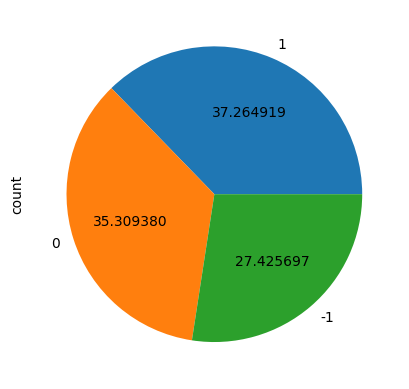

In [7]:
# afficher les nv pos , neg et neutre ds mon data 
df1['sentiment'].value_counts().plot.pie(autopct='%2f')

In [8]:
df1.head(20000)

,clean_joined,class,text_length,sentiment
0,smell hillari feardaniel greenfield shillman j...,1,550,1
1,watch exact moment paul ryan commit polit suic...,1,211,1
2,kerri pari gestur sympathyu secretari state jo...,0,225,-1
3,berni support twitter erupt anger tri warn kay...,1,217,1
4,battl york primari mattersit primari york fron...,0,148,1
...,...,...,...,...
19995,ethicist updat list accept thing masturb cambr...,1,14,1
19996,eddi gallag wake cold sweat nightmar watch inn...,1,21,-1
19997,leagu player admit kill woman vega polic trump...,0,16,1
19998,stephen colbert scorch news counterpoint trump...,0,19,1


## VISUALIZE CLEANED UP DATASET

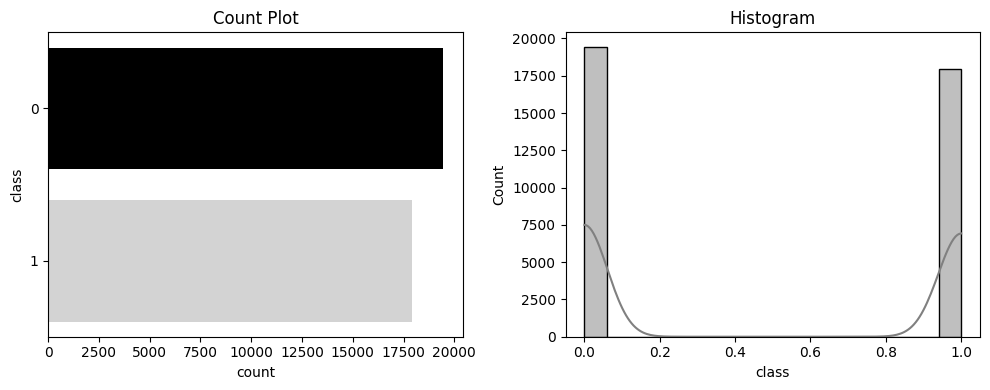

In [40]:
# plot the count plot fake vs true news

# Création d'une figure et d'axes pour les subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4)) 

# Définition de la palette de couleurs personnalisée
custom_palette = ["black", "lightgrey"]

# Tracé du countplot (barres) avec une palette de couleurs personnalisée pour 
sns.countplot(y='class', data=df1, ax=axes[0], hue='class', palette=custom_palette, legend=False)
axes[0].set_title('Count Plot')

# Tracé de l'histplot (histogramme avec densité) pour 'df' avec une couleur grise
sns.histplot(df1['class'], kde=True, ax=axes[1], color='grey')
axes[1].set_title('Histogram')

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher le subplot
plt.show()

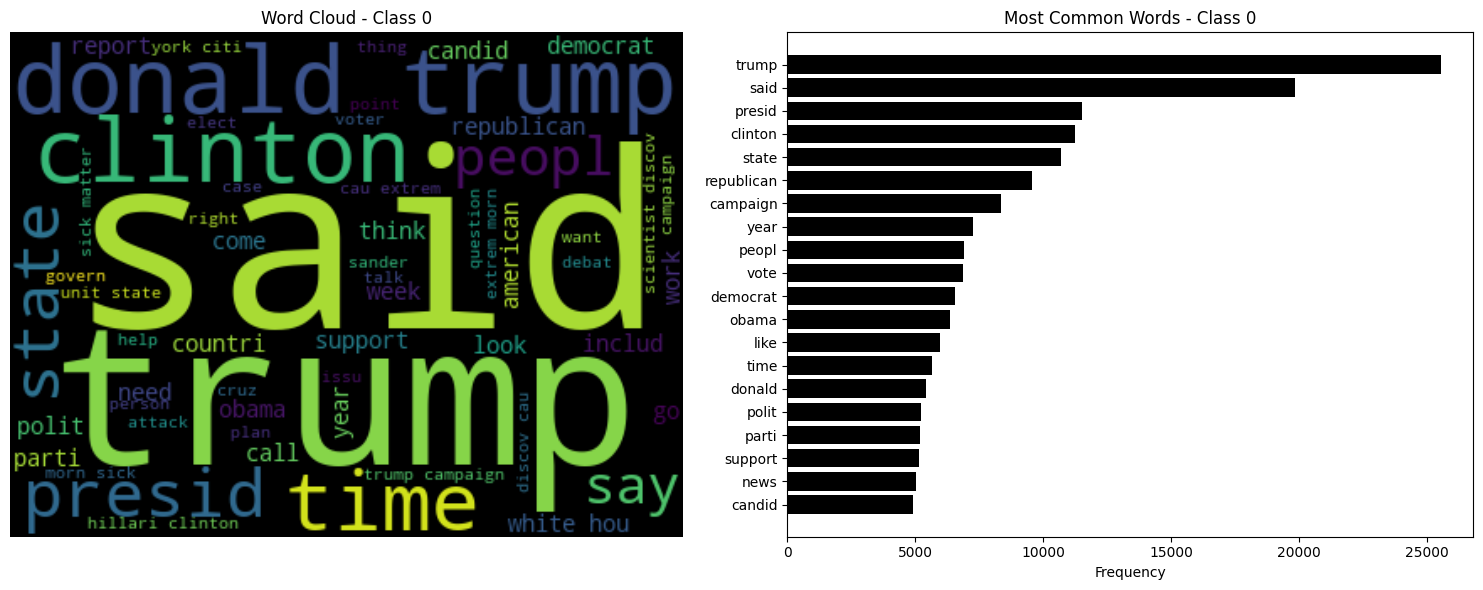

In [26]:
# Plot WordCloud for class 0
class_0_words = ' '.join(word for word in df1[df1['class'] == 0]['clean_joined'])
wordcloud_class_0 = WordCloud(width=400, height=300, background_color='black', min_font_size=10).generate(class_0_words)

# Plot most common words for class 0
class_0_word_list = class_0_words.split()
word_freq_class_0 = Counter(class_0_word_list)
top_words_class_0 = word_freq_class_0.most_common(20)
words_class_0, frequencies_class_0 = zip(*top_words_class_0)

# Create subplots
plt.figure(figsize=(15, 6))

# Subplot 1 - WordCloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_class_0, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Class 0')

# Subplot 2 - Bar Chart
plt.subplot(1, 2, 2)
plt.barh(words_class_0, frequencies_class_0, color='black')
plt.xlabel('Frequency')
plt.title('Most Common Words - Class 0')
plt.gca().invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



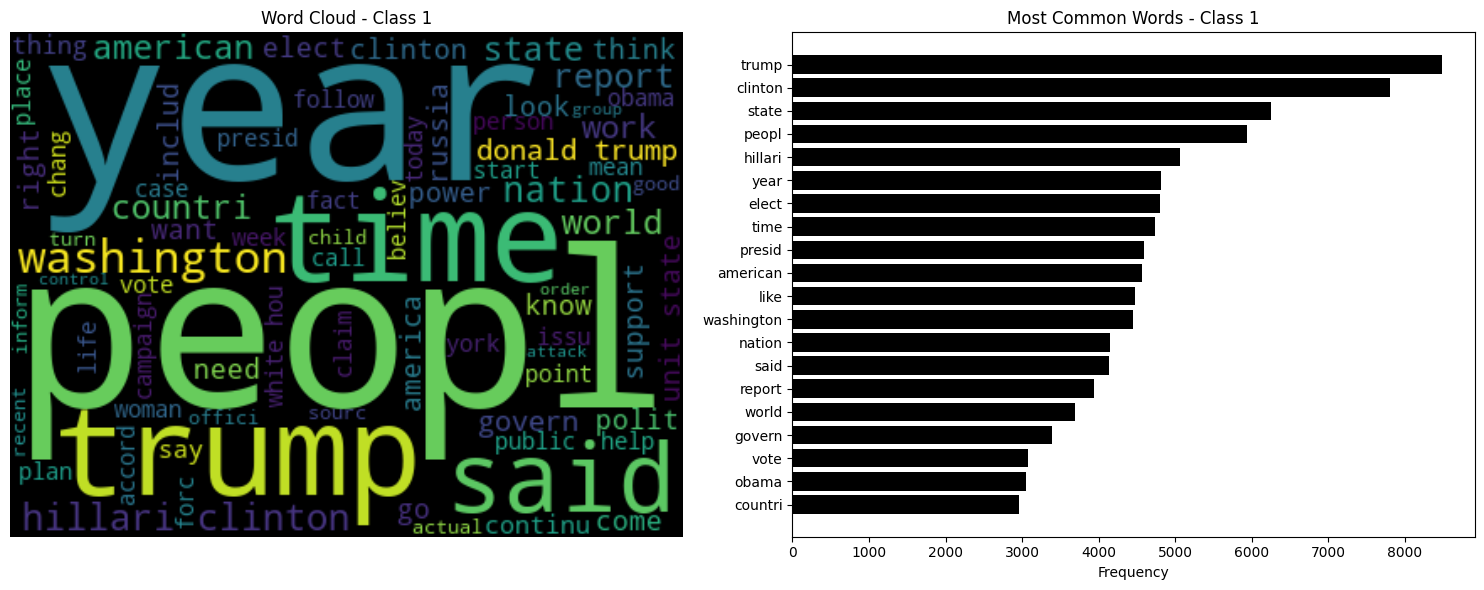

In [27]:
# Plot WordCloud for class 1
class_1_words = ' '.join(word for word in df1[df1['class'] == 1]['clean_joined'])
wordcloud_class_1 = WordCloud(width=400, height=300, background_color='black', min_font_size=10).generate(class_1_words)

# Plot most common words for class 1
class_1_word_list = class_1_words.split()
word_freq_class_1 = Counter(class_1_word_list)
top_words_class_1 = word_freq_class_1.most_common(20)
words_class_1, frequencies_class_1 = zip(*top_words_class_1)

# Create subplots
plt.figure(figsize=(15, 6))

# Subplot 1 - WordCloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_class_1, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Class 1')

# Subplot 2 - Bar Chart
plt.subplot(1, 2, 2)
plt.barh(words_class_1, frequencies_class_1, color='black')
plt.xlabel('Frequency')
plt.title('Most Common Words - Class 1')
plt.gca().invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


## PREPARE THE DATA FOR ALGORITHMES

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df1=pd.read_csv("data.csv")

In [4]:
df1.head()

,clean_joined,class,text_length,sentiment
0,smell hillari feardaniel greenfield shillman j...,1,550,1
1,watch exact moment paul ryan commit polit suic...,1,211,1
2,kerri pari gestur sympathyu secretari state jo...,0,225,-1
3,berni support twitter erupt anger tri warn kay...,1,217,1
4,battl york primari mattersit primari york fron...,0,148,1


In [5]:
# on fait la vectorization a laide de tfidf pr representer le text en format vectorielle avec une limitation de nbr de fonctionalite 
# a 10k pour maxfeatures 

vectorizer = TfidfVectorizer(max_features=10000)  
X_train1=df1['clean_joined']
# Fit and transform the 
X_tfidf = vectorizer.fit_transform(X_train1)
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
#Nombre de fois que chaque mot apparaitre / le nbr total des mots 
df_tfidf


,aaron,abaaoud,aback,abadi,abandon,abat,abba,abbi,abbott,abc,...,zinger,zionism,zionist,zombi,zone,zoom,zucker,zuckerberg,zuess,zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_tfidf.shape

(37381, 10000)

In [7]:
#aafecter
x1=X_tfidf
x1.shape

(37381, 10000)

In [9]:
from scipy.sparse import csr_matrix
x2=df1['text_length'].values
# Convertir x2 en une matrice creuse avec une seule colonne
x2_sparse = csr_matrix(x2.reshape(-1, 1))
x2_sparse.shape

(37381, 1)

In [10]:
x3=df1['sentiment'].values
x3_sparse = csr_matrix(x3.reshape(-1, 1))
#print(x3_sparse)
x3_sparse.shape

(37381, 1)

In [11]:
from scipy.sparse import hstack

X = hstack((x1, x2_sparse,x3_sparse))
y = df1['class'].values
y = y.reshape(-1, 1)
X.shape

(37381, 10002)

In [12]:
print(x1.shape)
print(x2_sparse.shape)
print(x3_sparse.shape)
print(y.shape)

(37381, 10000)
(37381, 1)
(37381, 1)
(37381, 1)


## Regression Logistique 

 X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [46]:
clf = LogisticRegression()
y_train = y_train.ravel()
y_test = y_test.ravel()
# Entrainer le modèle
clf.fit(X_train, y_train)

LogisticRegression()

In [48]:
# je fais la prediction pour le train au debut 
y_pred_train=clf.predict(X_train)
print(classification_report(y_train,y_pred_train))
score=accuracy_score(y_train,y_pred_train)
print(f'Accuracy: {round(score*100,2)}%')

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     13600
           1       0.96      0.98      0.97     12566

    accuracy                           0.97     26166
   macro avg       0.97      0.97      0.97     26166
weighted avg       0.97      0.97      0.97     26166

Accuracy: 96.79%


In [26]:
#predict 
y_pred=clf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5552  287]
 [ 120 5256]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      5839
           1       0.95      0.98      0.96      5376

    accuracy                           0.96     11215
   macro avg       0.96      0.96      0.96     11215
weighted avg       0.96      0.96      0.96     11215



In [28]:
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 96.37%


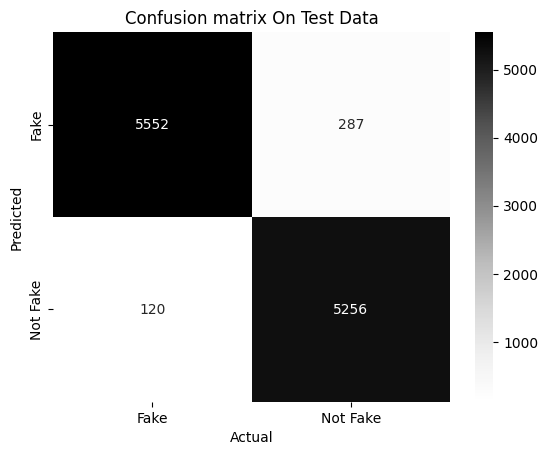

In [29]:
new_cm = pd.DataFrame(cm , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## best in logistic 

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Définition des hyperparamètres à rechercher
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Paramètre de régularisation
    'solver': ['liblinear', 'lbfgs','saga']  
}

# Initialisation du modèle Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Recherche des meilleurs paramètres avec GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et de la meilleure précision
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)


Meilleurs paramètres : {'C': 10, 'solver': 'liblinear'}
Meilleure précision : 0.9798593491335847


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack
from scipy.sparse import csr_matrix
import pandas as pd
from textblob import TextBlob
import numpy as np

# Supposons que vous avez déjà vos données df1 contenant 'clean_joined', 'text_length', 'sentiment', 'class'

# Diviser les données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle Logistic Regression
clf = LogisticRegression(C=10, solver='liblinear')
clf.fit(X_train, y_train)

# Nouvelles phrases
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from scipy.sparse import hstack, csr_matrix
from textblob import TextBlob
import numpy as np

new_phrases = [
    "Trump’s creating just the kind of legal chaos he wants for 2024",
    "trump take cruz lightlykil obama administr rule dismantl obamacar push reform earli todo list",
    "Source Says Megyn Kelly ‘Would Not Be Welcomed Back’ at Fox News",
    "Total Vetting Fail: Left-Wing Snowden Fan Girl Reality Winner Gets Access to Our NSA Secrets",
    "Blind Mystic Who Predicted 9/11 Has Bad News About Trump"
]

# Analyse du sentiment et calcul de la longueur des nouvelles phrases
new_phrases_sentiment = []
new_phrases_text_length = []

for phrase in new_phrases:
    # Calcul de la longueur de chaque phrase
    length = len(phrase.split())
    new_phrases_text_length.append(length)

    # Analyse du sentiment pour chaque phrase avec TextBlob
    blob = TextBlob(phrase)
    sentiment = blob.sentiment.polarity  # Obtenir la polarité du sentiment (valeurs entre -1 et 1)
    
    # Classification du sentiment en positif, négatif ou neutre
    if sentiment > 0:
        new_phrases_sentiment.append('positif')
    elif sentiment < 0:
        new_phrases_sentiment.append('négatif')
    else:
        new_phrases_sentiment.append('neutre')

# Conversion des données de sentiment en valeurs numériques
sentiment_mapping = {'positif': 1, 'négatif': -1, 'neutre': 0}
new_phrases_sentiment_numeric = [sentiment_mapping[sentiment] for sentiment in new_phrases_sentiment]

# Transformation des caractéristiques de texte en représentation vectorielle
new_phrases_tfidf = vectorizer.transform(new_phrases)

# Transformation des caractéristiques de texte en matrices rares (sparse matrices)
new_phrases_text_length_sparse = csr_matrix(np.array(new_phrases_text_length).reshape(-1, 1))
new_phrases_sentiment_sparse = csr_matrix(np.array(new_phrases_sentiment_numeric).reshape(-1, 1))

# Construction des données pour la prédiction en concaténant les différentes caractéristiques
new_phrases_combined = hstack((new_phrases_tfidf, new_phrases_text_length_sparse, new_phrases_sentiment_sparse))

# Prédiction des classes pour les nouvelles phrases
predicted_labels = clf.predict(new_phrases_combined)

# Affichage des prédictions pour les nouvelles phrases
for phrase, label, sentiment, length in zip(new_phrases, predicted_labels, new_phrases_sentiment, new_phrases_text_length):
    if label == 1:
        print(f"Phrase :  => Sentiment : {sentiment}, Longueur : {length} : Fake News  ")
    else:
        print(f"Phrase :  => Sentiment : {sentiment}, Longueur : {length} : True News ")



Phrase :  => Sentiment : positif, Longueur : 12 : Fake News  
Phrase :  => Sentiment : neutre, Longueur : 14 : True News 
Phrase :  => Sentiment : neutre, Longueur : 12 : Fake News  
Phrase :  => Sentiment : négatif, Longueur : 15 : Fake News  
Phrase :  => Sentiment : négatif, Longueur : 10 : Fake News  


## Random Forests

In [30]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
y_train = y_train.ravel()
y_test = y_test.ravel()
# Création du modèle Random Forest pour la classification
modele_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Entraînement du modèle
modele_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [40]:
#predict 
y_pred_rf=modele_rf.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[5447  392]
 [ 140 5236]]


In [42]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5839
           1       0.93      0.97      0.95      5376

    accuracy                           0.95     11215
   macro avg       0.95      0.95      0.95     11215
weighted avg       0.95      0.95      0.95     11215



In [43]:
score_rf=accuracy_score(y_test,y_pred_rf)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 95.26%


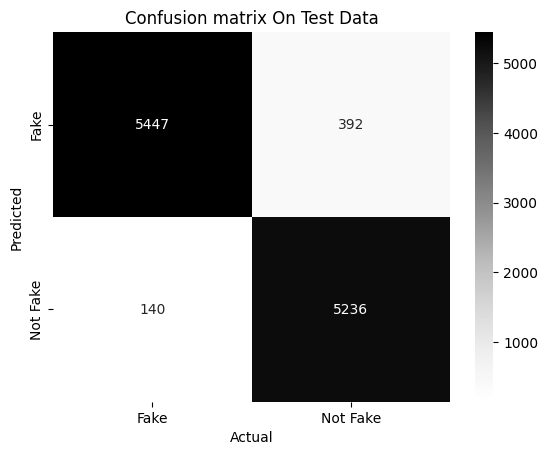

In [44]:
new_cm_rf = pd.DataFrame(cm_rf , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm_rf,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## Naive Bayes 

In [37]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.sparse import csr_matrix

# Vérification si votre matrice est une csr_matrix et conversion en une matrice dense si nécessaire
if isinstance(X_train, csr_matrix):
    X_train = X_train.toarray()
if isinstance(x_test, csr_matrix):
    x_test = x_test.toarray()

# Création du modèle Naive Bayes pour la classification
modele_naive_bayes = GaussianNB()

# Entraînement du modèle
modele_naive_bayes.fit(X_train, y_train)

GaussianNB()

In [42]:
y_pred = modele_naive_bayes.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

[[5684  155]
 [1616 3760]]


In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      5839
           1       0.96      0.70      0.81      5376

    accuracy                           0.84     11215
   macro avg       0.87      0.84      0.84     11215
weighted avg       0.87      0.84      0.84     11215



In [45]:
score_rf=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 84.21%


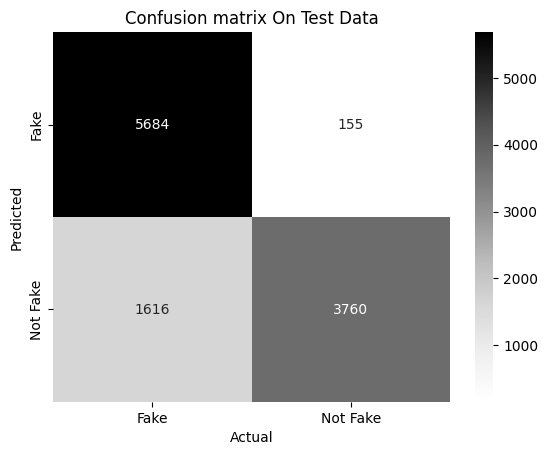

In [46]:
new_cm_rf = pd.DataFrame(cm_nb , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm_rf,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## Bernouli

In [16]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
# Reformater y_train et y_test en tableaux unidimensionnels
y_train = y_train.ravel()
y_test = y_test.ravel()

# Création du modèle Bernoulli Naive Bayes
modele_bernoulli_nb = BernoulliNB()

# Entraînement du modèle
modele_bernoulli_nb.fit(X_train, y_train)

BernoulliNB()

In [17]:
y_pred = modele_bernoulli_nb.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

[[5626  213]
 [ 307 5069]]


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5839
           1       0.96      0.94      0.95      5376

    accuracy                           0.95     11215
   macro avg       0.95      0.95      0.95     11215
weighted avg       0.95      0.95      0.95     11215



In [20]:
score_rf=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 95.36%


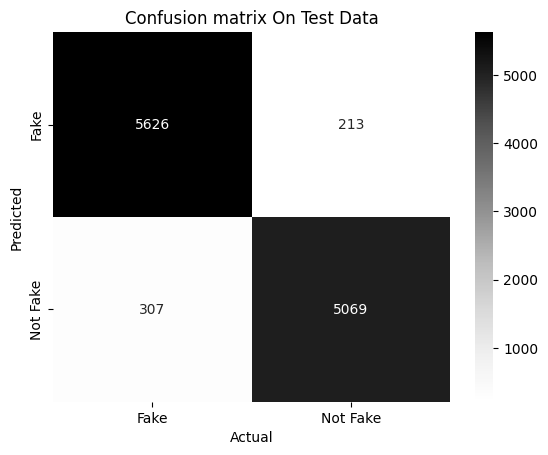

In [21]:
new_cm_rf = pd.DataFrame(cm_nb , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm_rf,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## Decision tree 

In [48]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Création du modèle d'arbre de décision pour la classification
modele_arbre_decision = DecisionTreeClassifier(random_state=42)

# Entraînement du modèle
modele_arbre_decision.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [51]:
y_pred = modele_arbre_decision.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

[[5525  314]
 [ 346 5030]]


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5839
           1       0.94      0.94      0.94      5376

    accuracy                           0.94     11215
   macro avg       0.94      0.94      0.94     11215
weighted avg       0.94      0.94      0.94     11215



In [54]:
score_rf=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 94.12%


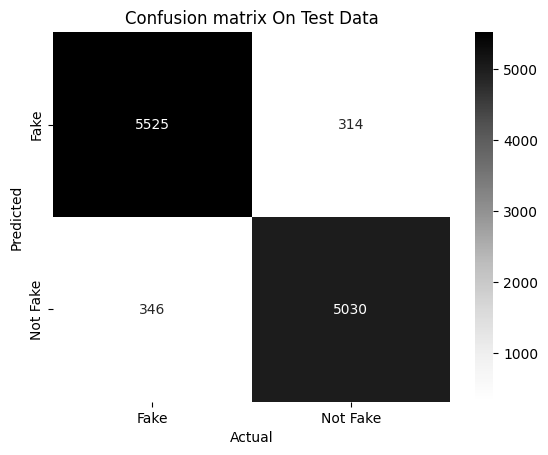

In [55]:
new_cm_rf = pd.DataFrame(cm_nb , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm_rf,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## best in decision tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Définition des hyperparamètres à rechercher
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons requis pour être une feuille
}

# Initialisation du modèle Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Recherche des meilleurs paramètres avec GridSearchCV
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres et de la meilleure précision
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)


Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Meilleure précision : 0.9391192734214201


## SVM 

In [17]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [58]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Reformater y_train et y_test en tableaux unidimensionnels
y_train = y_train.ravel()
y_test = y_test.ravel()

# Création du modèle SVM pour la classification
modele_svm = SVC(random_state=42)

# Entraînement du modèle
modele_svm.fit(X_train, y_train)

SVC(random_state=42)

In [60]:
y_pred = modele_svm.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

[[5626  213]
 [4976  400]]


In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.96      0.68      5839
           1       0.65      0.07      0.13      5376

    accuracy                           0.54     11215
   macro avg       0.59      0.52      0.41     11215
weighted avg       0.59      0.54      0.42     11215



In [63]:
score_rf=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 53.73%


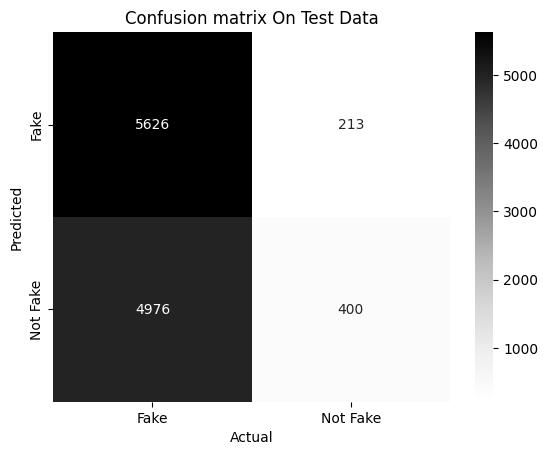

In [64]:
new_cm_rf = pd.DataFrame(cm_nb , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm_rf,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

## SVM avec C=0.1

In [18]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Reformater y_train et y_test en tableaux unidimensionnels
y_train = y_train.ravel()
y_test = y_test.ravel()

# Création du modèle SVM pour la classification
modele_svm = SVC(C=0.1, kernel='linear', random_state=42)

# Entraînement du modèle
modele_svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [20]:
y_pred = modele_svm.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

[[5571  268]
 [ 103 5273]]


In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5839
           1       0.95      0.98      0.97      5376

    accuracy                           0.97     11215
   macro avg       0.97      0.97      0.97     11215
weighted avg       0.97      0.97      0.97     11215



In [23]:
score_rf=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 96.69%


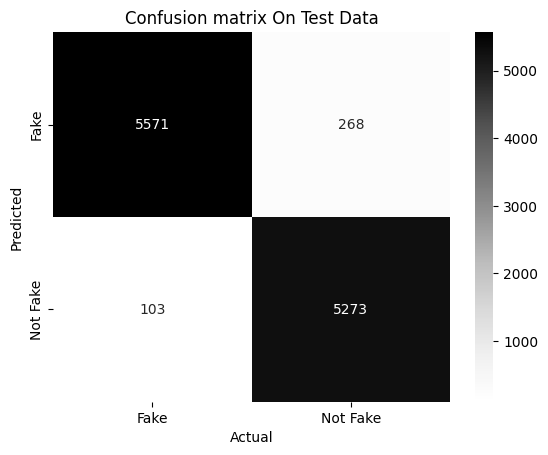

In [24]:
new_cm_rf = pd.DataFrame(cm_nb , index = ['Fake','Not Fake'] , columns = ['Fake','Not Fake'])
sns.heatmap(new_cm_rf,cmap= 'Greys', annot = True, fmt='',xticklabels = ['Fake','Not Fake'], yticklabels = ['Fake','Not Fake'])
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion matrix On Test Data')
plt.show()

In [65]:
## best parametres pour svm : 

In [68]:
X_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

y_train = y_train.ravel()
y_test = y_test.ravel()
# Création du modèle SVM
modele_svm = SVC()
# Grille des hyperparamètres à tester
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf']
}
# Recherche des meilleurs paramètres avec validation croisée (5-fold cross-validation)
grid_search = GridSearchCV(modele_svm, param_grid, cv=5, scoring='accuracy')



In [ ]:
grid_search.fit(X_train, y_train)
# Affichage des meilleurs paramètres trouvés
print("Meilleurs paramètres:")
print(grid_search.best_params_)

In [ ]:
# Utilisation du meilleur modèle pour la prédiction sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Évaluation du modèle avec les meilleurs paramètres
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")